In [58]:
import BPTK_Py
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd

bptk = BPTK_Py.bptk()
model = Model(starttime=1.0,stoptime=24.0, dt=1.0, name='thermostat2')

In [59]:
roomTemperature = model.stock("roomTemperature")

In [60]:
heating = model.flow("heating")
cooling = model.flow("cooling")

In [61]:
thermostatSetting = model.constant("thermostatSetting")
outsideTemperature = model.converter("outsideTemperature")

discrIn = model.converter("discrIn")
discrOut = model.converter("discrOut")

inRate = model.converter("inRate")
outRate = model.converter("outRate")

In [62]:
roomTemperature.initial_value = 0.0

thermostatSetting.equation = 19.0
outsideTemperature.equation = 0.0

discrIn.equation = thermostatSetting - roomTemperature 
discrOut.equation = outsideTemperature - roomTemperature

inRate.equation = .5 * discrIn
outRate.equation = .1 * discrOut

smooth = model.converter("smooth")
smooth.equation = sd.smooth(model,outsideTemperature,2.0,0.0) 

roomTemperature.equation = inRate + outRate

In [63]:
bptk.register_model(model)

In [64]:
scenario_manager = {
    "smThermostat2":{
        "model": model,
        "base_constants": {
            "thermostatSetting": 25.0,
            "outsideTemperature": 25.0
        }
    }
}

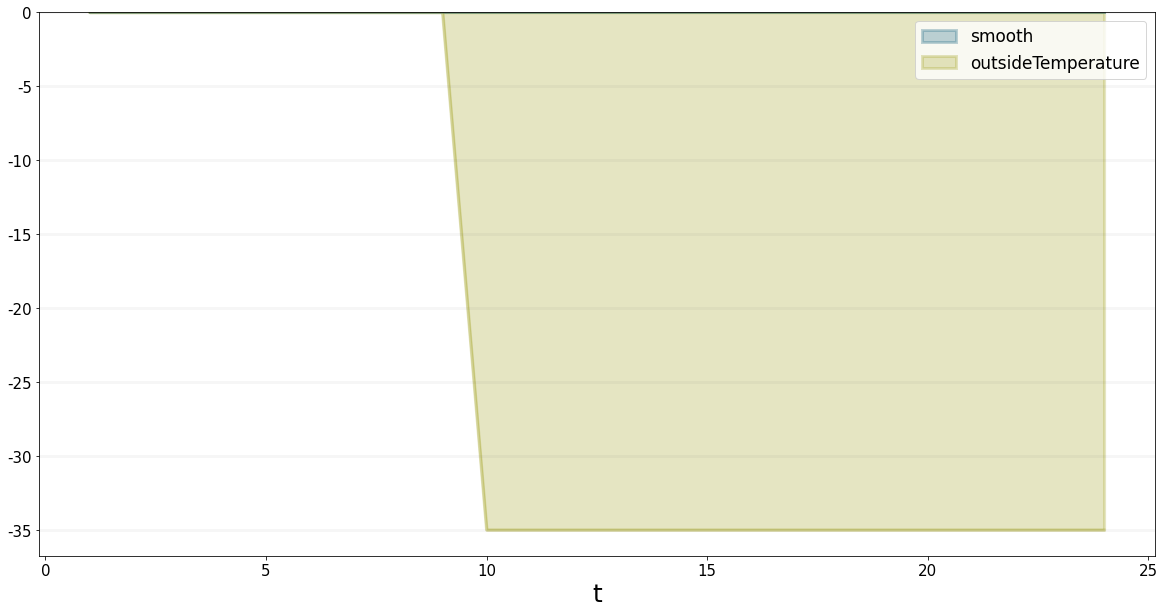

In [65]:
bptk.register_scenario_manager(scenario_manager)

bptk.register_scenarios(
    scenarios ={
        "s01": {
            "constants": {
                "outsideTemperature": 0,
            },
            "strategy": {
                "10": {"outsideTemperature": -35}
            }
        }
    },
    scenario_manager="smThermostat2")

bptk.plot_scenarios(
    scenarios=["s01"],
    scenario_managers="smThermostat2",
    equations=["smooth", "outsideTemperature"],
    series_names={},
    strategy=True
)

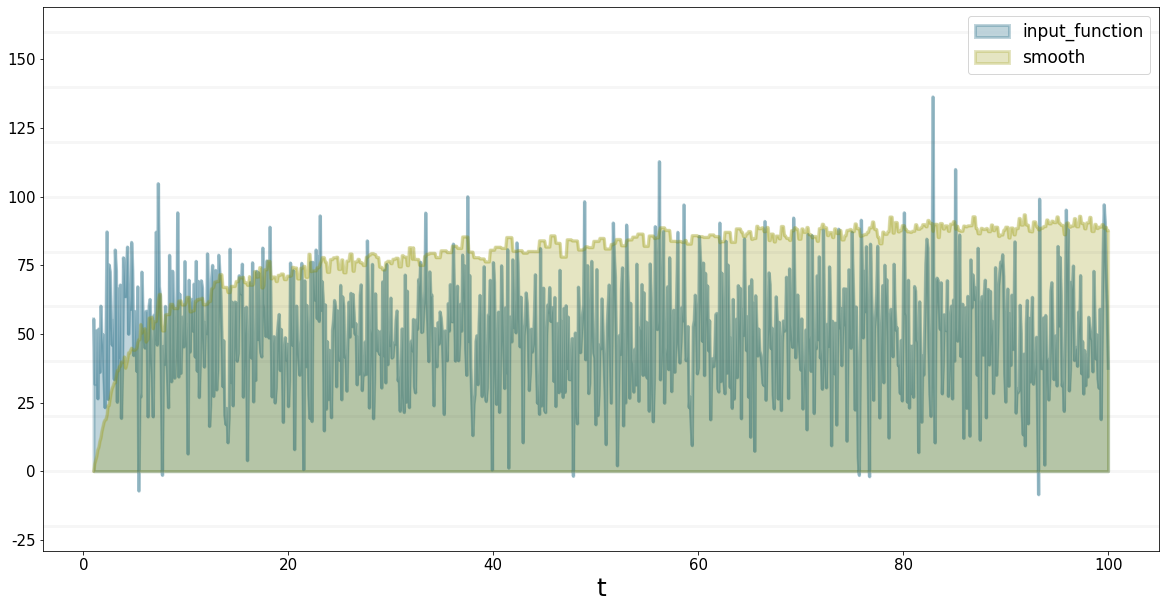

In [75]:
model = Model(starttime=1.0,stoptime=100.0,dt=0.1,name='foobaqq')

input_function = model.converter("input_function")
input_function.equation=sd.normal(50, 20)

smooth = model.converter("smooth")
smooth.equation = sd.smooth(model,input_function,2.0,0.0) 

bptk.register_model(model)
bptk.plot_scenarios(scenario_managers=["smFoobaqq"],scenarios=["base"],equations=["input_function","smooth"])

In [76]:
bptk.reset_all_scenarios()

{}